## Linear model for classification

In [1]:
import pandas as pd

In [2]:
penguins = pd.read_csv("data/penguins_classification.csv")

# Only keep the Adelie and Chinstrap classes
penguins = penguins.set_index("Species").loc[
    ["Adelie", "Chinstrap"]].reset_index()
culmen_columns = ["Culmen Length (mm)", "Culmen Depth (mm)"]
target_column = "Species"

In [3]:
penguins.head()

,Species,Culmen Length (mm),Culmen Depth (mm)
0,Adelie,39.1,18.7
1,Adelie,39.5,17.4
2,Adelie,40.3,18.0
3,Adelie,36.7,19.3
4,Adelie,39.3,20.6


In [4]:
import matplotlib.pyplot as plt

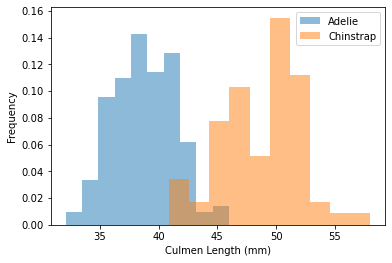

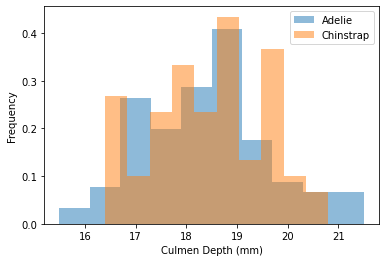

In [5]:
for feature_name in culmen_columns:
    plt.figure()
    # plot the histogram for each specie
    penguins.groupby("Species")[feature_name].plot.hist(
        alpha=0.5, density=True, legend=True)
    plt.xlabel(feature_name)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
penguins_train, penguins_test = train_test_split(penguins, random_state=0)

data_train = penguins_train[culmen_columns]
data_test = penguins_test[culmen_columns]

target_train = penguins_train[target_column]
target_test = penguins_test[target_column]

range_features = {
    feature_name: (penguins[feature_name].min() - 1,
                   penguins[feature_name].max() + 1)
    for feature_name in culmen_columns
}

In [8]:
import numpy as np

In [9]:
def plot_decision_function(fitted_classifier, range_features, ax=None):
        """Plot the boundary of the decision function of a classifier."""
        from sklearn.preprocessing import LabelEncoder
        
        feature_names = list(range_features.keys())
        # create a grid to evaluate all possible samples
        plot_step = 0.02
        xx, yy = np.meshgrid(
            np.arange(*range_features[feature_names[0]], plot_step),
            np.arange(*range_features[feature_names[1]], plot_step),
        )
        
        # compute the associated prediction
        Z = fitted_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = LabelEncoder().fit_transform(Z)
        Z = Z.reshape(xx.shape)
        
        # make the plot of the boundary and the data samples
        if ax is None:
            _, ax = plt.subplotss()
        ax.contourf(xx, yy, Z, alpha=0.4, cmap="RdBu_r")
        
        return ax

In [10]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [11]:
logistic_regression = make_pipeline(
    StandardScaler(), LogisticRegression(penalty="none")
)
logistic_regression.fit(data_train, target_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(penalty='none'))])

In [12]:
import seaborn as sns

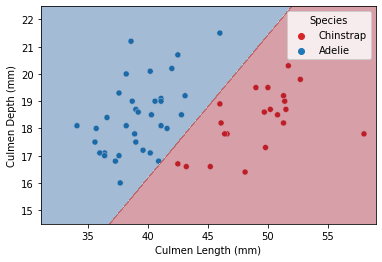

In [13]:
ax = sns.scatterplot(
    data=penguins_test, x=culmen_columns[0], y=culmen_columns[1],
    hue=target_column, palette=["tab:red", "tab:blue"])
_ = plot_decision_function(logistic_regression, range_features, ax=ax)

In [14]:
coefs = logistic_regression[-1].coef_[0] # the coefficients is a 2d array
weights = pd.Series(coefs, index=culmen_columns)

Text(0.5, 1.0, 'Weights of the logistic regression')

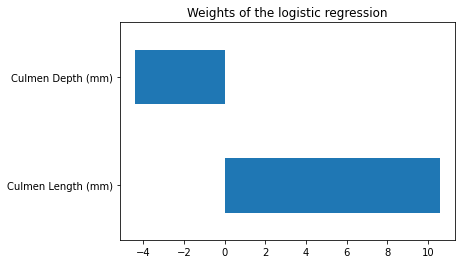

In [15]:
weights.plot.barh()
plt.title("Weights of the logistic regression")

Indeed, both coefficients are non-null.